# Predicting the possible earnings package for the candidate based on the profile 

In [433]:
import os
import pandas as pd
import numpy as np
import pandas_profiling as pp
import datetime as dt

In [434]:
os.getcwd()

'C:\\Users\\Navi\\Desktop\\New folder'

In [435]:
os.chdir("C:\\Users\\Navi\\Desktop\\New folder")

# Reading the Data

In [436]:
#Reading the Data
train=pd.read_csv("Train-1550224040162.csv")
test=pd.read_csv("Test-1550224068068.csv")

In [437]:
pp.ProfileReport(train)

Number of variables,34
Number of observations,26397
Total Missing (%),0.0%
Total size in memory,6.8 MiB
Average record size in memory,272.0 B
Numeric,25
Categorical,7
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [438]:
train.head()

,Candidate ID,Pay_in_INR,Gender,Date Of Birth,Score in Tenth,School Board in Tenth,Year Of Twelth Completion,Score in Twelth,Board in Twelth,CollegeCode,...,Score in ComputerScience,Score in MechanicalEngg,Score in ElectricalEngg,Score in TelecomEngg,Score in CivilEngg,Score in conscientiousness,Score in agreeableness,Score in extraversion,Score in nueroticism,Score in openess_to_experience
0,304390,400000.0,m,13-06-1990 00:00,67.60,cbse,2007,70.20,cbse,494,...,-100,-100,-100,-100,-100,-0.8810,-0.5913,-0.3440,-0.7603,-0.9194
1,1104236,145000.0,f,08-10-1992 00:00,71.00,cbse,2009,64.00,cbse,4889,...,376,-100,-100,-100,-100,-3.8933,-5.6151,-3.9861,-0.8682,-6.6092
2,1015299,200000.0,f,17-09-1991 00:00,75.00,icse,2010,66.80,cbse,7827,...,-100,-100,-100,-100,-100,1.1336,1.7109,0.1637,0.7798,0.4805
3,781929,300000.0,f,13-02-1992 00:00,85.00,cbse,2008,69.00,cbse,1125,...,-100,-100,-100,-100,-100,0.9900,-0.1206,-0.1437,0.0192,-0.2859
4,271036,530000.0,m,25-08-1988 00:00,88.64,karnataka board,2006,65.16,karnataka board,1629,...,125,-100,-100,-100,-100,1.2266,-0.4778,-0.3440,-0.1727,-1.8386


In [439]:
train.shape

(26397, 34)

# Understanding the Data

In [440]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


The train data has 26397 rows and 34 columns
----------------------------
The test data has 10875 rows and 33 columns


In [441]:
train.describe(include='all' )

,Candidate ID,Pay_in_INR,Gender,Date Of Birth,Score in Tenth,School Board in Tenth,Year Of Twelth Completion,Score in Twelth,Board in Twelth,CollegeCode,...,Score in ComputerScience,Score in MechanicalEngg,Score in ElectricalEngg,Score in TelecomEngg,Score in CivilEngg,Score in conscientiousness,Score in agreeableness,Score in extraversion,Score in nueroticism,Score in openess_to_experience
count,2.639700e+04,2.639700e+04,26397,26397,26397.000000,26397,26397.000000,26397.000000,26397,26397.000000,...,26397.000000,26397.000000,26397.00000,26397.000000,26397.000000,26397.000000,26397.000000,26397.000000,26397.000000,26397.000000
unique,NaN,NaN,2,2638,NaN,263,NaN,NaN,330,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,m,25-08-1988 00:00,NaN,cbse,NaN,NaN,cbse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,22374,80,NaN,9377,NaN,NaN,9440,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.240293e+06,6.416441e+05,NaN,NaN,80.819707,NaN,2007.188809,78.144888,NaN,3582.320112,...,38.328068,-60.211426,-91.07122,-71.521006,-90.422510,-0.199025,0.222604,-0.036647,-0.197603,-0.134446
std,2.442005e+05,3.301311e+05,NaN,NaN,8.098918,NaN,1.541945,9.416241,NaN,4068.683670,...,158.424988,130.570447,62.23260,104.790451,60.120976,0.876466,0.689406,0.757915,0.787642,0.728815
min,1.124400e+04,3.500000e+04,NaN,NaN,43.000000,NaN,1998.000000,40.000000,NaN,2.000000,...,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.305076e+06,5.110000e+05,NaN,NaN,75.815211,NaN,2006.000000,71.573101,NaN,285.000000,...,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000,-0.736100,-0.165000,-0.495000,-0.706600,-0.581200
50%,1.314497e+06,5.750000e+05,NaN,NaN,82.321893,NaN,2007.000000,78.706685,NaN,1622.000000,...,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000,-0.131300,0.309500,0.010000,-0.214500,-0.094300
75%,1.324009e+06,6.710000e+05,NaN,NaN,86.960614,NaN,2008.000000,85.112147,NaN,6164.000000,...,134.000000,-100.000000,-100.00000,-100.000000,-100.000000,0.418700,0.684900,0.471100,0.292500,0.368400


In [442]:
train.dtypes

Candidate ID                        int64
Pay_in_INR                        float64
Gender                             object
Date Of Birth                      object
Score in Tenth                    float64
School Board in Tenth              object
Year Of Twelth Completion           int64
Score in Twelth                   float64
Board in Twelth                    object
CollegeCode                         int64
CollegeTier                         int64
Graduation                         object
Discipline                         object
GPA Score in Graduation           float64
CityCode                            int64
CityTier                            int64
State                              object
Year of Graduation Completion       int64
Score in English language           int64
Score in Logical skill              int64
Score in Quantitative ability       int64
Score in Domain                   float64
Score in ComputerProgramming        int64
Score in ElectronicsAndSemicon    

# Checking for Missing Values


In [443]:
train.isnull().sum()

Candidate ID                      0
Pay_in_INR                        0
Gender                            0
Date Of Birth                     0
Score in Tenth                    0
School Board in Tenth             0
Year Of Twelth Completion         0
Score in Twelth                   0
Board in Twelth                   0
CollegeCode                       0
CollegeTier                       0
Graduation                        0
Discipline                        0
GPA Score in Graduation           0
CityCode                          0
CityTier                          0
State                             0
Year of Graduation Completion     0
Score in English language         0
Score in Logical skill            0
Score in Quantitative ability     0
Score in Domain                   0
Score in ComputerProgramming      0
Score in ElectronicsAndSemicon    0
Score in ComputerScience          0
Score in MechanicalEngg           0
Score in ElectricalEngg           0
Score in TelecomEngg        

# Identifying Unique Values

In [444]:
unique_counts = pd.DataFrame.from_records([(col, train[col].nunique()) for col in train.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,Gender,2
15,CityTier,2
10,CollegeTier,2
11,Graduation,3
17,Year of Graduation Completion,10
6,Year Of Twelth Completion,13
16,State,26
12,Discipline,46
26,Score in ElectricalEngg,181
28,Score in CivilEngg,244


# Dropping the Unique value variable - candidate ID and similar varibles like scores in extraversion

In [445]:
train.columns

Index(['Candidate ID', 'Pay_in_INR', 'Gender', 'Date Of Birth',
       'Score in Tenth', 'School Board in Tenth', 'Year Of Twelth Completion',
       'Score in Twelth', 'Board in Twelth', 'CollegeCode', 'CollegeTier',
       'Graduation', 'Discipline', 'GPA Score in Graduation', 'CityCode',
       'CityTier', 'State', 'Year of Graduation Completion',
       'Score in English language', 'Score in Logical skill',
       'Score in Quantitative ability', 'Score in Domain',
       'Score in ComputerProgramming', 'Score in ElectronicsAndSemicon',
       'Score in ComputerScience', 'Score in MechanicalEngg',
       'Score in ElectricalEngg', 'Score in TelecomEngg', 'Score in CivilEngg',
       'Score in conscientiousness', 'Score in agreeableness',
       'Score in extraversion', 'Score in nueroticism',
       'Score in openess_to_experience'],
      dtype='object')

In [446]:
train = train.drop(['Candidate ID','Date Of Birth','State','Discipline','Graduation','School Board in Tenth','Board in Twelth','CityCode','Gender',],axis=1)

In [447]:
test = test.drop(['Candidate ID','Date Of Birth','State','Discipline','Graduation','School Board in Tenth','Board in Twelth','CityCode','Gender'],axis=1 )

In [448]:
train.shape

(26397, 25)

In [449]:
test.shape

(10875, 24)

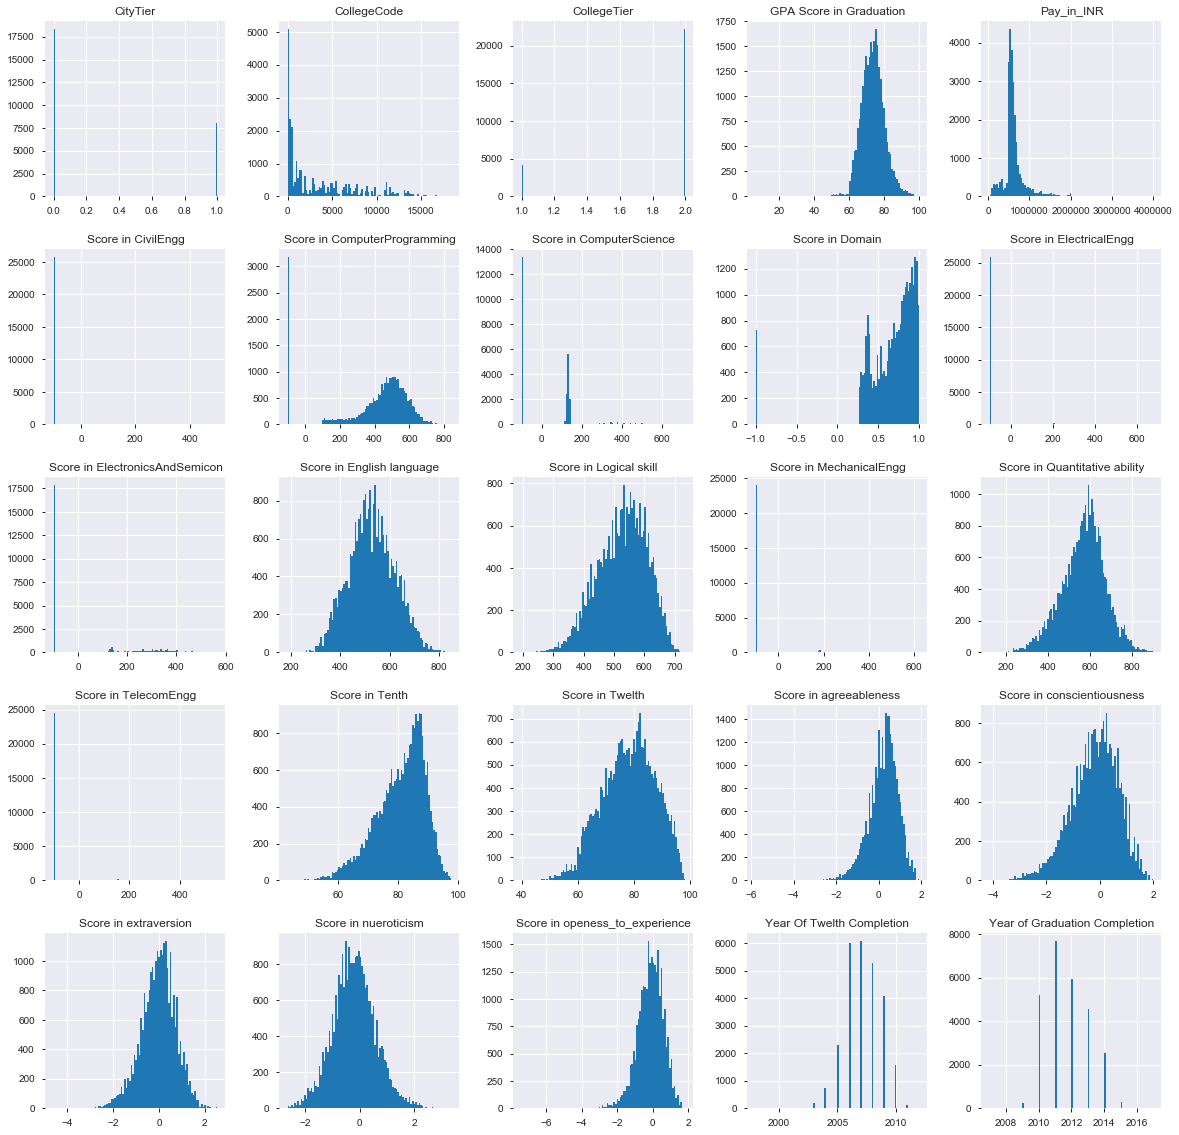

In [450]:
#Histogram of all the varaibles

%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=100, figsize=(20,20))
plt.savefig("attribute_histogram_plots")
plt.show()

# from above histogram we can see 'Pay_in_INR' is Right skewed

## Visualizing the Target Variable which is Pay_in_INR

In [451]:
# Distribution of Targer variable
train['Pay_in_INR'].describe()

count    2.639700e+04
mean     6.416441e+05
std      3.301311e+05
min      3.500000e+04
25%      5.110000e+05
50%      5.750000e+05
75%      6.710000e+05
max      4.000000e+06
Name: Pay_in_INR, dtype: float64

C:\Users\Navi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


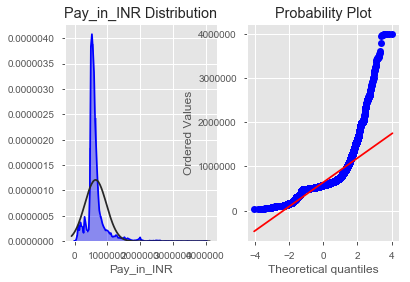

Skewness: 3.371525
Kurtosis: 18.469953


In [452]:
# Let us analyse the Target
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use(style='ggplot')

#Check the Skewness and Kurtosis of Target variable
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Pay_in_INR Distribution")
sns.distplot(train.Pay_in_INR.dropna(), fit=stats.norm, color='blue')
plt.subplot(1, 2, 2)
stats.probplot(train.Pay_in_INR, plot=plt)
plt.show()
print("Skewness: %f" % train.Pay_in_INR.skew())
print("Kurtosis: %f" % train.Pay_in_INR.kurt())

In [453]:
# Transformation: use np.log() totransform trian.SalePrice and Calculate Skewness and Kurtoisis
target = np.log(train.Pay_in_INR)
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: -0.682991
Kurtosis: 4.813826


In [454]:
for col in train [['CollegeTier','CityTier','CollegeCode',]]:
    train[col] = train[col].astype('category')

In [455]:
for col in test [['CollegeTier','CityTier','CollegeCode',]]:
    test[col]=test[col].astype('category')

# seperation of train & test numerical and category 

In [456]:
#To seperate the train and test data
train_num = train.select_dtypes(include=[np.number])
train_cat = train.select_dtypes(exclude=[np.number])

test_num = test.select_dtypes(include=[np.number])
test_cat = test.select_dtypes(exclude=[np.number])

In [457]:
train_num .shape

(26397, 22)

In [458]:
# Calcution correlation between all numeric features
corr = train_num.corr()
print(corr['Pay_in_INR'].sort_values(ascending=False))

Pay_in_INR                        1.000000
Score in agreeableness            0.072047
Score in Logical skill            0.067272
Score in English language         0.064753
Score in ComputerProgramming      0.052235
Score in extraversion             0.046408
Score in MechanicalEngg           0.026318
Score in ComputerScience          0.021569
Score in CivilEngg                0.020394
Score in Domain                   0.010947
Score in Quantitative ability    -0.002665
GPA Score in Graduation          -0.005087
Score in openess_to_experience   -0.015346
Score in Twelth                  -0.016066
Score in Tenth                   -0.021221
Score in ElectricalEngg          -0.047810
Score in ElectronicsAndSemicon   -0.057681
Score in TelecomEngg             -0.058333
Score in conscientiousness       -0.059967
Score in nueroticism             -0.079778
Year of Graduation Completion    -0.090168
Year Of Twelth Completion        -0.131103
Name: Pay_in_INR, dtype: float64


In [459]:
#to find the shape of the train and test data
print(train_num.shape)
print(test_num.shape)

(26397, 22)
(10875, 21)


In [460]:
# Create correlation matrix
corr_matrix = train_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [461]:
#there are no numeric variables having within corelation with each other
to_drop

[]

In [462]:
#combing numerical and categorical data
train_merged=pd.concat([train_num,train_cat],axis=1)
test_merged=pd.concat([test_num,test_cat],axis=1)

In [463]:
print(train_merged.shape)
print(test_merged.shape)

(26397, 25)
(10875, 24)


# splitting the Data

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
y=train_merged.Pay_in_INR

In [466]:
X=train_merged
X.drop(columns=["Pay_in_INR"],inplace=True)

In [467]:
# Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=8951, test_size=0.2)

In [468]:
#to seperate categorical and numerical attributes in both train and test
X_train_cat=X_train.select_dtypes(exclude=[np.number])
X_train_num=X_train.select_dtypes(include=[np.number])

X_test_cat=X_test.select_dtypes(exclude=[np.number])
X_test_num=X_test.select_dtypes(include=[np.number])

test_split_cat=test_merged.select_dtypes(exclude=[np.number])
test_split_num=test_merged.select_dtypes(include=[np.number])

In [469]:
print(X_train_num.shape)
print(X_test_num.shape)
print(test_split_num.shape)

(21117, 21)
(5280, 21)
(10875, 21)


In [470]:
X_train_cat.shape,X_test_cat.shape,test_split_cat.shape

((21117, 3), (5280, 3), (10875, 3))

In [471]:
print(X_train_cat.shape)
print(X_test_cat.shape)
print(test_split_cat.shape)

(21117, 3)
(5280, 3)
(10875, 3)


In [472]:
#final merging of the data
X_train_final=pd.concat([X_train_num,X_train_cat],axis=1)
X_test_final=pd.concat([X_test_num,X_test_cat],axis=1)
test_final=pd.concat([test_split_num,test_split_cat],axis=1)

In [473]:
print(X_train_final.shape)
print(X_test_final.shape)
print(test_final.shape)

(21117, 24)
(5280, 24)
(10875, 24)


# Model Building

In [474]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [475]:
# Random Forest algorithm
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=250,n_jobs=-1)
rfr.fit(X_train_final,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [476]:
y_rfr_train_preds=rfr.predict(X=X_train_final)
y_rfr_test_preds=rfr.predict(X=X_test_final)
y_rfr_sub_preds=rfr.predict(X=test_final)

In [480]:
#exponential of the predictions
y_rfr_train_preds=np.exp(y_rfr_train_preds)
y_rfr_test_preds=np.exp(y_rfr_test_preds)
y_rfr_sub_preds=np.exp(y_rfr_sub_preds)

C:\Users\Navi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Navi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [482]:
y_rfr_sub_preds=pd.DataFrame(y_rfr_sub_preds)

In [484]:
y_rfr_sub_preds.to_csv("submission5.csv",index=False)